<a href="https://colab.research.google.com/github/pranjul6386/covid_rfmd/blob/master/vgg_rfmd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/drive/My Drive/kaggle_notebooks/RMFD.zip"

In [4]:
import os
import numpy as np
import cv2
import keras
from tensorflow.keras.applications.resnet50 import ResNet50
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import *
from keras import optimizers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import ModelCheckpoint

In [5]:
list_images=[]
labels=[]

In [6]:
for filename in os.listdir("/content/images/nomask"):
  for img in os.listdir("/content/images/nomask" + "/" + filename):
    path= str("/content/images/nomask" + "/"+ filename + "/" + img)
    try:

      image=cv2.imread(path)
    except:
      print("file not found error")

      continue
    image=cv2.resize(image,(224,224))
    arr=np.array(image)
    list_images.append(arr)
    labels.append("unmasked")
    if len(list_images)>2000:
      break

In [7]:
for filename in os.listdir("/content/images/mask"):
  for img in os.listdir("/content/images/mask" + "/" + filename):
    path= str("/content/images/mask" + "/"+ filename + "/" + img)
    try:

      image=cv2.imread(path)
    except:
      print("file not found error")

      continue
    image=cv2.resize(image,(224,224))
    arr=np.array(image)
    list_images.append(arr)
    labels.append("masked")

In [8]:
y_train=np.array(labels)
labelencoder=LabelEncoder()

y_train=labelencoder.fit_transform(y_train)


In [9]:
x_train=np.array(list_images)

In [10]:
print(x_train.shape)
print(y_train.shape)

(4653, 224, 224, 3)
(4653,)


In [11]:
base_model=VGG16(weights='imagenet')
model=Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)
t=model.predict(x_train)

553467904/553467096 [==============================] - 3s 0us/step


In [12]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
t.shape

(4653, 4096)

In [14]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(t, y_train, test_size=0.2)

# SVM 

Running time: 8.5768 seconds
0.9903329752953813
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       426
           1       0.99      1.00      0.99       505

    accuracy                           0.99       931
   macro avg       0.99      0.99      0.99       931
weighted avg       0.99      0.99      0.99       931



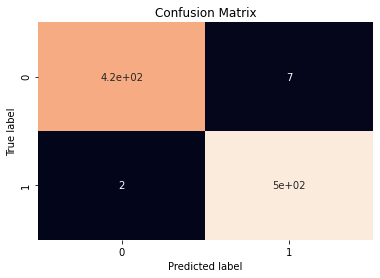

In [15]:
import time
start = time.time()
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
import seaborn as sns
clf = SVC()
clf.fit(Xtrain, Ytrain)
preds = clf.predict(Xtest)

print('Running time: %.4f seconds' % (time.time()-start))
print(accuracy_score(Ytest, preds))

cm = confusion_matrix(Ytest, preds)
sns.heatmap(cm, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
print(classification_report(Ytest, preds))

# Decision tree classifier

0.9688506981740065
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       426
           1       0.97      0.97      0.97       505

    accuracy                           0.97       931
   macro avg       0.97      0.97      0.97       931
weighted avg       0.97      0.97      0.97       931



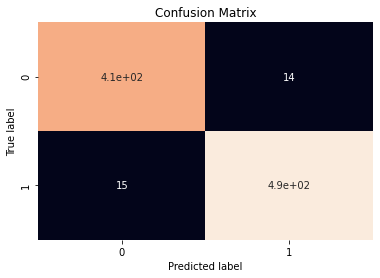

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
clf_des = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf_des.fit(Xtrain, Ytrain)
preds_des=clf_des.predict(Xtest)

print(accuracy_score(Ytest, preds_des))
cm1 = confusion_matrix(Ytest, preds_des)
sns.heatmap(cm1, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
print(classification_report(Ytest, preds_des))

# Random forest

{'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       426
           1       0.99      0.99      0.99       505

    accuracy                           0.99       931
   macro avg       0.99      0.99      0.99       931
weighted avg       0.99      0.99      0.99       931



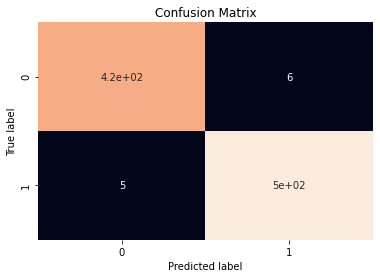

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#create a new random forest classifier
rf = RandomForestClassifier()
#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)
#fit model to training data
rf_gs.fit(Xtrain, Ytrain)

#save best model
rf_best = rf_gs.best_estimator_
#check best n_estimators value
print(rf_gs.best_params_)
preds_rf=rf_best.predict(Xtest)
cm4 = confusion_matrix(Ytest, preds_rf)
sns.heatmap(cm4, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
print(classification_report(Ytest, preds_rf))

# Kneighborclassifier

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#create new a knn model
knn = KNeighborsClassifier()#create a dictionary of all values we want to test for n_neighbors

#fit model to training data
knn.fit(Xtrain, Ytrain)

#save best mod

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       426
           1       0.97      1.00      0.98       505

    accuracy                           0.98       931
   macro avg       0.98      0.98      0.98       931
weighted avg       0.98      0.98      0.98       931



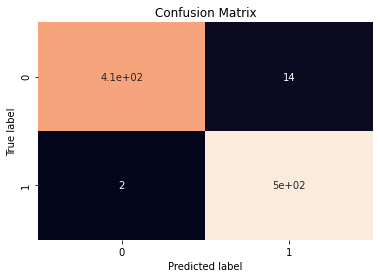

In [21]:
preds_knn=knn.predict(Xtest)
cm6 = confusion_matrix(Ytest, preds_knn)
sns.heatmap(cm6, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
print(classification_report(Ytest, preds_knn))

In [24]:
knn.score(Xtest, Ytest)

0.9828141783029001

# ensemble 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       426
           1       0.98      1.00      0.99       505

    accuracy                           0.99       931
   macro avg       0.99      0.99      0.99       931
weighted avg       0.99      0.99      0.99       931



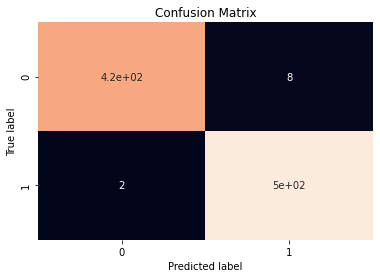

In [23]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('knn', knn), ('rf', rf_best), ('svm', clf)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')
#fit model to training data
ensemble.fit(Xtrain, Ytrain)
#test our model on the test dat
preds_en=ensemble.predict(Xtest)
cm5 = confusion_matrix(Ytest, preds_en)
sns.heatmap(cm5, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
print(classification_report(Ytest, preds_en))

In [25]:
print(ensemble.score(Xtest, Ytest))

0.9892588614393125
